# ★강화학습 (Reinforcement Learning) RL 파트1 스터디내용 총정리
###1.Reinforcement Learning Intro
###2.Markov Decision Process
###3.Dynyamic Programming
###4.Model Free Prediction
###4-1.Monte-Carlo Policy Evaluation
###4-2.Temporal-Difference Learning

## 강화학습 내용은 다음 [강의자료](http://www0.cs.ucl.ac.uk/staff/D.Silver/web/Teaching.html) 내용으로 스터디 했습니다.

### 스터디는 싸이그래머 & 싸이지먼트에서 이루어집니다.
### [github 주소](https://github.com/psygrammer/dprl)

###1. Intro

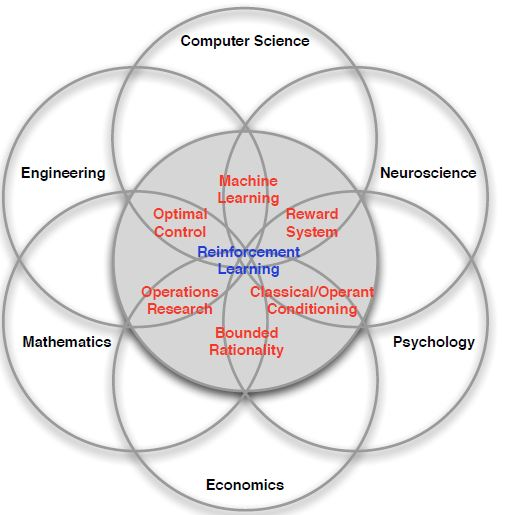

In [3]:
from IPython.display import Image
Image(filename='RL1/1.png') 

## 1. Intro
### 기존 머신러닝과 다른 이유
- 감독자가 없음 (No Supervisor), 오직 보상의 시그널만 있음.
- 피드백은 지연될 수 있음. 
- 강화학습의 시간은 순차적이지만 iid하지 않음. (iid : independent identically distributed)
- 기계의 액션은 얻게되는 순차적인 데이터에 영향을 끼침.
- 시간이 진행됨에 따라 최적의 의사결정을 내려야 하는 순차적 의사결정 문제
### 강화학습 실예제
- 헬리콥터 비행
- 포트폴리어 투자 관리
- 발전소 제어
- 인간형 로봇 걷기
- 아타리 게임

### Rewards
- 시간에 따른 보상은 스칼라 한 값의 피드백 신호
- step t일때 기계에게 잘 지시하는 것
- 기계는 누적 보상을 최대화 하기 하는 방향으로 학습.
> Definition : 기계의 모든 목표는 예상되는 누적 보상의 극대화를 하기 위해 설명될 수 있음.

### Goals
- 총 미래의 보상를 최대화하기 위한 액션을 선택하는 것.
- 액션은 긴 기간의 결과를 봐야될 수도 있습니다.
- 보상은 지연될 수 있음.
- 장기적인 보상을 얻기 위해서 바로 다음 직전의 보상이 마이너스라도 그것을 감수하더라도(희생하는 것이) 나을 수 있음.

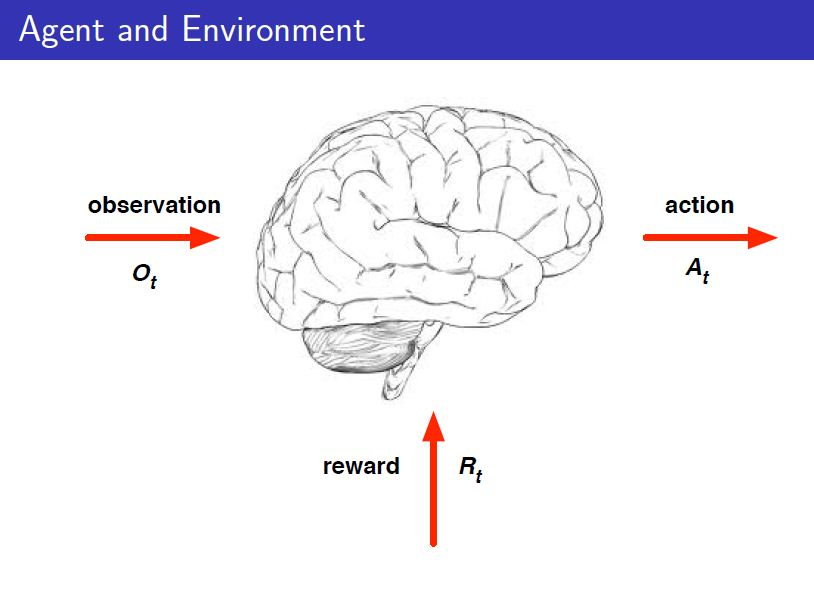

In [4]:
Image(filename='RL1/2.jpg') 

### 기계 그리고 실세계
- 기계는 step t를 반복. Action At를 실행, observation Ot를 받음, scalar reward Rt를 받음
- 환경은 Action At를 받음, Ot+1, Rt+1 (다음 관찰치 / 보상을 보냄)

### 과거와 상태
- Ht = O1, R1, A1, ..., At-1, Ot, Rt로 구성됨. 
- 기계는 액션들을 선택, 환경은 관찰치와 보상들을 선택.
- 상태는 다음 일어날 것을 결정하기 위해 쓰이는데 St = f(Ht), 상태는 역사의 특정한 함수이다.

### 환경 상태
- The environment state Set is the environment's private representation
- The environment state is not usually visible to the agent
- Even if Set is visible, it may contain irrelevant information

### 기계 상태
- The agent state Sat is the agent's internal representation
- it is the information used by reinforcement learning algorithms
- It can be any function of history Stq = f(ht)

### 정보 상태
- 정보 상태(Markov Stage)는 과거로 부터 모든 유용한 정보를 포함한다.
- P[St+1 | St] = P[St+1 | S1, ..., St] 다음 상태는 현재 상태에만 영향을 받는 마코브 조건.
- 미래는 현재 상태를 알면 과거와 독립적임. 환경 상태와 과거는 마코브 성질을 따름.

### Fully Observable Enviroments
- 기계가 환경 상태를 모두 관측할 수 있음. 
- 기계 상태 = 환경 상태 = 정보 상태
- 이것은 MDP(Markov decision process)

###Partially Observable Environments
- 기계는 모든 환경 상태를 알 수 없음 (로봇, 트레이딩 에이전트, 포커 플레이 기계 모두... 현재의 패만 알 수 있음)
- agent stage != environment stage
- 이것을 partially observable Markov decision process (POMDP)라고 부름.

### RL의 중요 요소들
- Policy : 기계의 행동 함수 (behaviour function)
- Value Function : 각 상태 또는 액션이 좋은지에 대한 판단 값.
- Model : 환경을 표현하는 기계
- Policy는 Determinisic policy, Stochastic Policy가 있음. 파이(s), 파이(a|s)
- Value Function은 미래의 보상을 예측하는 것. 상태가 좋은지 나쁜지 판단하기 위해 쓰임. 
- Model은 환경이 실행된 다음 것을 예측할 수 있어야함. (전이확률, 보상 등을)

### Learning and Planning
- 순차적 의사결정에는 2가지 기본적인 문제가 있음. 
- Learning : 환경은 초기값을 알 수 없음, 기계는 환경과 상호작용, 기계는 정책을 향상시킴.
- Planning : 환경의 모델은 모든 것을 암. 기계는 모델 없이 계산할 수 있음. 기계는 정책을 향상시킴. 
- Prediction and Control 측면, 미래 값을 평가하는 것(정책이 주어졌을때). 미래 값을 최적화 하는 것(최적의 정책을 찾기 위해서)

## 2.Markov Decision Process
- Agent 제어기, Environment 환경, 상호작용에 따라 관찰되는 상태 (state), 입력 (action), 보상 값 (reward), 최적의 정책(policy)을 찾아가는 방향으로 학습을 진행
- 확률 과정 : 시스템의 상태가 시간에 따라 확률적으로 변해가는 과정
- 확률 과정 중에서 시스템의 미래상태가 현재의 상태만 주어지면 과거의 역사와는 무관하게 결정되는 성질(markov property)을 가지는 확률 과정
- Markov process에서 시간의 변화를 연속적으로(continuous) 고려하지 않고 이산적인 경우(discrete) 만 고려한 경우

### MDP 용어정리
- state : 현재 상태
- Action : 현재 상태에서 하고 있는 행동
- Reward : 현재 행동을 통해 얻은 Feedback
- Policy : 어떤 상태에서 어떤 행동을 할지를 정해주는 함수
- Transition Probability (or Dynamic model) : 어떤 상태에서 어떤 행동을 했을 때 다른 상태들로 넘어갈 확률

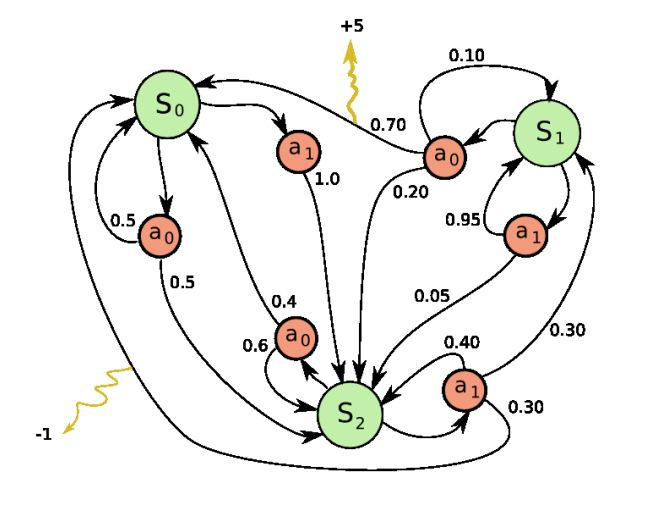

In [6]:
Image(filename='RL1/3.jpg') 

### Markov decision process vs Markov chain
- If only one action exists for each state and all rewards are the same (e.g. zero) , a Markov decision process reduces to a Markov chain.
### Discounted Return
- Return : 어떤 state에서 어떤 행동을 했을 때 어떤 state로 넘어간다고 했을 때, 해당 경우에 주어지는 값
- 현재 들어오는 return이 나중에 들어오는 return에 비해서 gamma 라는 factor 만큼 더 중요한 것을 의미한다.

### Markov Property 
- 확률에서 Markov property는 현재가 주어졌을 때 과거와 미래에 대한 conditional independency를 의미 (내일의 확률은 오늘에만 dependent하다)

>###Bellman Equation
[Bellman Equation Wiki](https://en.wikipedia.org/wiki/Bellman_equation)
![](https://upload.wikimedia.org/math/f/3/9/f39b440fcaeff900a10324564fb2005c.png)

``` 
Bellman Equation R코드
actions <- c("N", "S", "E", "W")
x <- 1:4
y <- 1:3
rewards <- matrix(rep(0, 12), nrow=3)
rewards[2, 2] <- NA
rewards[1, 4] <- 1
rewards[2, 4] <- -1
rewards
values <- rewards # initial values
values
states <- expand.grid(x=x, y=y)
states
#### Transition probability
transition <- list("N" = c("N" = 0.8, "S" = 0, "E" = 0.1, "W" = 0.1), 
                   "S"= c("S" = 0.8, "N" = 0, "E" = 0.1, "W" = 0.1),
                   "E"= c("E" = 0.8, "W" = 0, "S" = 0.1, "N" = 0.1),
                   "W"= c("W" = 0.8, "E" = 0, "S" = 0.1, "N" = 0.1))
transition
#### The value of an action (e.g. move north means y + 1)
action.values <- list("N" = c("x" = 0, "y" = 1), 
                      "S" = c("x" = 0, "y" = -1),
                      "E" = c("x" = -1, "y" = 0),
                      "W" = c("x" = 1, "y" = 0))

#### act() function serves to move the robot through states based on an action
act <- function(action, state) {
  action.value <- action.values[[action]]
  new.state <- state
  #
  if(state["x"] == 4 && state["y"] == 1 || (state["x"] == 4 && state["y"] == 2))
    return(state)
  #
  new.x = state["x"] + action.value["x"]
  new.y = state["y"] + action.value["y"]
  # Constrained by edge of grid
  new.state["x"] <- min(x[length(x)], max(x[1], new.x))
  new.state["y"] <- min(y[length(y)], max(y[1], new.y))
  #
  if(is.na(rewards[new.state["y"], new.state["x"]]))
    new.state <- state
  #
  return(new.state)
}


bellman.update <- function(action, state, values, gamma=1) {
  state.transition.prob <- transition[[action]]
  q <- rep(0, length(state.transition.prob))
  for(i in 1:length(state.transition.prob)) {        
    new.state <- act(names(state.transition.prob)[i], state) 
    q[i] <- (state.transition.prob[i] * (rewards[state["y"], state["x"]] + (gamma * values[new.state["y"], new.state["x"]])))
  }
  sum(q)
}

value.iteration <- function(states, actions, rewards, values, gamma, niter) {
  for (j in 1:niter) {
    for (i in 1:nrow(states)) {
      state <- unlist(states[i,])
      if(i %in% c(4, 8)) next # terminal states
      q.values <- as.numeric(lapply(actions, bellman.update, state=state, values=values, gamma=gamma))
      values[state["y"], state["x"]] <- max(q.values)
    }
  }
  return(values)
}

final.values <- value.iteration(states=states, actions=actions, rewards=rewards, values=values, gamma=0.99, niter=100)
final.values
```


## 3. Dynyamic Programming
- 동적프로그래밍은 하위 문제로 쪼갬으로서 복잡한 문제를 해결하기 위한 방법. 
    - Solve the subproblems (하위문제로 푸는것)
    - Combine solutions to subproblems (하위문제의 솔루션을 합치는 것)    

- 엄밀히 말해 동적 계획법은 구체적인 알고리즘이라기보다는 문제해결 패러다임에 가깝다. 동적 계획법은 "어떤 문제를 풀기위해 그 문제를 더 작은 문제의 연장선으로 생각하고, 과거에 구한 해를 활용하는" 방식의 알고리즘을 총칭한다. 동적 계획법을 써야 좋은 효과를 얻을 수 있는 문제들은 주로 Optimal Substructure라고 불리는 구조를 가진 것들이다. 쉽게 이야기하면, 뭘 구하기 위해서 했던 계산을 또하고 또하고 계속해야하는 류의 문제를 풀 때 동적 계획법이 효과를 발휘한다는 것. (출처: https://namu.wiki/w/%EB%8F%99%EC%A0%81%20%EA%B3%84%ED%9A%8D%EB%B2%95)

- 동적프로그래밍은 2가지 속성을 가지고 문제에 대한 일반적인 솔루션을 찾음.
- Optimal substructure (최적 부분구조 ; 큰 문제의 최적 솔루션에 작은 문제의 최적 솔루션이 포함됨)
    - Principle of optimality applies (최적의 행동을 위해 행동을 결정할 때 그 종료시점까지의 모든 결정이 반영됨)
    - Optimal solution can be decomposed into subproblems (서브 문제로 풀어도 최적의 솔루션을 보장함)

- Overlapping subproblems (서브문제로 중복)
    - Subproblems recur many times (서브문제는 여러번 순환됨)
    - Solutions can be cached and reused (솔루션은 저장되고 재이용됨)

- 마코브 결정 프로세스는 양쪽 특성을 만족함. 
    - Bellman equation은 재귀로 문제를 분해할 수 있음.
    - Value function 값은 저장되고 재사용됨.     
    
- MDP와 같은 환경의 완전한 모델이 주어진 최적 정책(policy)을 계산하기 위해 사용하는 알고리즘의 집합. 
- 동적 프로그래밍은 알고리즘의 집합인데 MDP과 같은 완벽한 모델에서 최적의 정책을 계산하는 데 사용할 수 있음.
- 고전적인 동적프로그래밍 알고리즘은 완전한 모델에서 많은 계산양 때문에 강화학습에서 제한적이였음. 
- 완전한 모델 가정을 완화. Less computation and without assuming a perfect model of the environment.
- 제한적인 MDP (상태,액션 셋의 전이행렬이 제한적)
- Approximate solutions (continuous state and action spaces를 정량화하면)

>*상태 가치 함수(Stae value function)의 벨만 방정식*
>
> V'(s) = ![optimal value funciton](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/numeqnarraytmp5-0-2.png)
>      = ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/numeqnarraytmp5-1-2.png)

>*상태-액션 가치 함
> Q*(S,A) = ![op수 (State-action value funciton)의 벨만 방정식*
>timal value funciton](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/numeqnarraytmp6-0-2.png)
>        = ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/numeqnarraytmp6-1-2.png)
 
- DP 알고리즘으로 근사화하면 벨만 방정석을 돌려 값을 얻을 수 있음.

### 1) Overlapping subproblems

In [24]:
def fib(n):
	if n == 0: return 0
	if n == 1: return 1
	return fib(n-1) + fib(n-2)

In [8]:
fib(3)

2

In [9]:
fib(10)

55

In [10]:
fib(5)
fib(4) + fib(3)
fib(3) + fib(2) + fib(2) + fib(1)
fib(2) + fib(1) + fib(1) + fib(0) + fib(1) + fib(0) + fib(1)
fib(1) + fib(0) + fib(1) + fib(1) + fib(0) + fib(1) + fib(0) + fib(1)

5

![](http://s21.postimg.org/66kdqgdev/tree.png)

| (a,b) | 그냥 계산시 연산횟수  | 동적계획법 이용시 연산횟수 |
|---|---|---|---|---|
| (2,2) | 6 | 5 |
| (4,4) | 70 | 17 |
| (6,8) | 3003 | 49 |
| (10,10) | 184756 | 101 |

In [11]:
def fib2(n):
	n2, n1 = 0, 1
	for i in range(n-2): 
		n2, n1 = n1, n1 + n2
	return n2+n1

- k번째 단계에서 우리는 fiB (K-1) 및 fiB (K-2)의 값을 알 필요가 있지만, 우리는 서로를 여러 번 호출하는 바람. 아래에서부터 시작하여 우리가 방대한 중복을 제거, 다음 단계에 필요한 숫자를 계산할 수 올라감.
- fib2 기능은 O(N) 시간이 걸리는 반면 fIB 기능은 N의 지수, 즉, O(CN승) 시간이 걸립니다
> ![](http://assets.20bits.com/20070508/fib_performance_thumb.png)

### 2) Optimal Substructure
- 문제는 전역 최적해가 하위 문제로 쪼개지더라도 국부적 최적해을 구성할 수있는 경우 최적의 서브 구조를 가졌다고 할 수 있음. 
- 완전 탐색 방법(brute-force method)은 모든 서브 세트를 생성 비용을 계산하고 그 값 중에서 최대 (또는 최소)을 발견하는 것이다. 그러나 N(A)에는 제한이 없는 경우의 요소는 크기 2N의 검색 공간을 찾고 있습니다 완전 탐색 방법 계산이 불가능하게 큰 경우. 예제를 살펴 보자. The
- 최대 부분 배열합 문제 (정수의 배열이 있다고 가정해 봅시다. 연속적인 배열에서 값을 더해 큰 값을 찾는 문제. [1,2,-5,4,7,-2]에서 연속적인 배열의 합이 가장 큰 값은 [4,7] 이므로 더하면 11) 
- 완전 탐색 방법 (he brute-force solution) Because of the constraints on the problem, namely that the subsets under consideration are contiguous, we only have to check O(n2) subarrays (why?). Here it is, in Python: 

In [12]:
def msum(a):
	return max([(sum(a[j:i]), (j,i)) 
                for i in range(1,len(a)+1) 
                for j in range(i)])

In [13]:
example = [1,2,-5,4,7,-2]

In [14]:
msum(example)

(11, (3, 5))

- This returns both the sum and the offsets of the subarray. Let's see if we can't find an optimal substructure to exploit. 

- We are given an input array a. I'm going to use Python notation so that a[0:k] is the subarray starting at 0 and including every element up to and including k-1. Let's say we know the subarray of a[0:i] with the largest sum (and that sum). Using just this information can we find the subarray of a[0:i+1] with the largest sum? 

- Let a[j:k+1] be the optimal subarray, t the sum of a[j:i], and s the optimal sum. If t+a[i] is greater than s then set a[j:i+1] as the optimal array and set s = t. If t + a[i] is negative, however, the contiguity constraint means that we cannot include a[j:i+1] in our subarray since any such subarray will have a smaller sum than a subarray without it. So, if t+a[i] is negative set t = 0 and set the left-hand bound of the optimal subarray to i+1. 

- To visualize consider the array [1,2,-5,4,7,-2]. 

In [ ]:
Set s = -infinity, t = 0, j = 0, bounds = (0,0)
(1   2  -5   4   7  -2 
(1)| 2  -5   4   7  -2  (set t=1.  Since t > s, set s=1 and bounds = (0,1))
(1   2)|-5   4   7  -2  (set t=3.  Since t > s, set s=3, and bounds = (0,2))
 1   2  -5(| 4   7  -2  (set t=-2. Since t < 0, set t=0 and j = 3 )
 1   2  -5  (4)| 7  -2  (set t=4.  Since t > s, set s=4 and bounds = (3,4))
 1   2  -5  (4   7)|-2  (set t=11. Since t > s, set s=11 and bounds = (3,5))
 1   2  -5  (4   7) -2| (set t=9.  Nothing happens since t < s)

In [16]:
def msum2(a):
	bounds, s, t, j = (0,0), -float('infinity'), 0, 0
	
	for i in range(len(a)):
		t = t + a[i]
		if t > s: bounds, s = (j, i+1), t
		if t < 0: t, j = 0, i+1
	return (s, bounds)

In [17]:
msum2(example)

(11, (3, 5))

- 배열을 통해 단지 세 개의 변수를 추적함. 각각의 단계에서 하나의 패스를 필요 현재 지점에 경계의 왼쪽 에지로부터 합 (t)를, 최대 합 (S) 현재 최적의 부분 배열 (bound).(This requires only one pass through the array and at each step we're only keeping track of three variables: the current sum from the left-hand edge of the bounds to the current point (t), the maximal sum (s), and the bounds of the current optimal subarray (bounds)).

- 이미 본 것에 대해서만 의사결정하는 최적 솔루션. In this problem the "globally optimal" solution corresponds to a subarray with a globally maximal sum, but at each each step we only make a decision relative to what we have already seen. That is, at each step we know the best solution thus far, but might change our decision later based on our previous information and the current information. This is the sense in the problem has optimal substructure. Because we can make decisions locally we only need to traverse the list once, reducing the run-time of the solution to O(n) from O(n2). Again, a graph:

### 3-1 정책반복(Policy Evaluation)
- 최적 의사결정 및 최적 제어문제의 해를 구하기 위한 반복계산 기법이다. 정책평가(policy evaluation) 루틴과 정책향상(policy improvement) 루틴으로 구성되어 있으며, 이 두개의 루틴을  교대로 반복실행하여 최적화 문제를 해결한다. 여기서, 정책평가 루틴은 현재 에이전트 (agent)의 행동에 대한 가치함수 (value function)을 정확히 추정하여 에이전트의 성능을 평가하고, 정책향상 루틴은 추정된 가치함수를 기반으로 에이전트의 성능을 향상시키는 역할을 한다. (연속시간 선형시스템에 대한 탐색화된 정책반복법 논문 참조)

- Finite MDP의 optimal policy를 구하는 대표적인 두 알고리즘으로는 value iteration과 policy iteration이라는 알고리즘이 존재한다. 두 알고리즘은 이름에서 알 수 있듯 모두 iterative algorithm이며, 위에서 언급한 intuition이 그대로 적용되는 알고리즘들이다. 즉, initial state에 invariant하며 iteration 동안 value function이 monotonically increase한다. 그리고 그 값이 converge하게 되면 우리가 원하는 optimal policy를 구할 수 있다.

>*임의에 정책에 따른 상태 가치 함수*
>V파이(s) = ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/numeqnarraytmp7-0-2.png)
>        = ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/numeqnarraytmp7-1-2.png)
>       = ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/numeqnarraytmp7-2-2.png)

- where 파이(s,a) is the probability of taking action  in state  under policy , v파이(s)는 미지수. 그래서 해결방법은 번거로운 반복 해법(iterative solution). value function를 근사화함. 각 매핑에 대해서 초기 근사치가 임의로 선택. 각각의 연속 근사 업데이트 규칙이 적용

>*임의의 k에 따른 상태 가치 함수*
> Vk+1'(s) = ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/numeqnarraytmp8-0-2.png)
>          = ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/numeqnarraytmp8-1-2.png)

- Vk = V파이(s) Vk의 시퀀스. k가 무한대로 가면 수렴함. 
- 반복적 정책 평가는 각 상태에 동일한 동작을 적용에서, 각각의 연속적인 근사화를 생산. 정책에 따라 가능한 모든 한 단계 전환이 평가되고 따라서는 후임 상태의 이전 값에서 얻은 새 값과 예상 즉각적인 보상으로의 이전 값을 대체합니다. 작업의 이런 종류의 전체 백업을 호출합니다. 반복적인 정책 평가의 각 반복은 새로운 근사값 기능을 생산하기 위해 한 번 모든 상태의 값을 백업합니다. 
- 반복적인 정책 평가를 구현하기 위해 순차적으로 컴퓨터 프로그램을 작성하려면, 두 배열이 필요, 이전 값에 하나, 새로운 값 하나를 사용해야 합니다.
- 이전의 값이 변경되지 않고,이 방법은, 새로운 값이 이전 값으로부터 하나씩 계산 될 수있다. 물론 각각의 새로운 백업 값이 바로 이전을 덮으므로(장소의 값을 업데이트) 하나의 배열을 사용하는 것.
- 반복적인 정책 평가를 위한 전형적인 정지 조건은 각 반복후 테스트하고 충분히 작은 경우 중지하는 것.
- This is an undiscounted, episodic task(종결 상태가 있는 작업), The initial approximation, , is chosen arbitrarily 
> Iterative policy evaluation
> ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/pseudotmp0.png)
> ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/figtmp15.png)

- 작은 gridworld에 반복적인 정책 평가의 수렴. 왼쪽 열은 임의의 정책에 대한 상태 값 함수의 근사의 순서 (모든 동작은 동일)입니다.우측 열은 함수값 추정치에 대응 욕심 정책 시퀀스이다. 마지막 정책은 임의의 정책에 개선이 보장되지만 이 경우 세번째 반복 후 모든 정책에 최적이다. Convergence of iterative policy evaluation on a small gridworld. The left column is the sequence of approximations of the state-value function for the random policy (all actions equal). The right column is the sequence of greedy policies corresponding to the value function estimates (arrows are shown for all actions achieving the maximum). The last policy is guaranteed only to be an improvement over the random policy, but in this case it, and all policies after the third iteration, are optimal.


### 3-2 정책향상(Policy Improvement)
- 정책의 가치 함수를 계산하는 이유는 더 나은 정책을 찾을라고 하는 것입니다. 임의의 비확률적(결정적) 정책에 대한 value function을 결정했다고 가정하자. 일부 상태의 경우 결정론적 행동을 선택할 수있는 정책을 변경해야 하는지 여부를 알고 싶습니다. 그러나 그것이 좋든 나쁜 새 정책을 변경하는 것입니다 즉 현재의 정책을 따르는 것이 좋다는 걸 안다면. 이 질문에 대답하는 한 가지 방법은, 기존 정책을 다음과 이후에 거기 선택 고려하는 것입니다. 행동하는 이러한 방법의 값은 Our reason for computing the value function for a policy is to help find better policies. Suppose we have determined the value function  for an arbitrary deterministic policy . For some state  we would like to know whether or not we should change the policy to deterministically choose an action . We know how good it is to follow the current policy from --that is --but would it be better or worse to change to the new policy? One way to answer this question is to consider selecting  in  and thereafter following the existing policy, . The value of this way of behaving is 

> Q파이(s,a) = ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/numeqnarraytmp9-0-2.png)
>            = ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/numeqnarraytmp9-1-2.png)

- 중요한 기준은,이보다 크거나보다 작은 지의 여부이다. 가 큰 경우 - 즉, 그것은 항상 수행하는 것보다 수행 후 한번 선택하는 것이 낫다 경우이다 - 다음 하나가 발생 될 때마다 선택하는 것이 여전히 더 좋을을 기대하고 그 새로운 정책은 실제로 더 나은 하나의 전체가 될 것입니다. 이 사실이라고하면 정책 개선의 정리라는 일반적인 결과의 특별한 경우이다. 하자 등, 그 모든 결정 정책의 쌍을, The key criterion is whether this is greater than or less than . If it is greater--that is, if it is better to select  once in  and thereafter follow  than it would be to follow  all the time--then one would expect it to be better still to select  every time  is encountered, and that the new policy would in fact be a better one overall. That this is true is a special case of a general result called the policy improvement theorem. Let  and  be any pair of deterministic policies such that, for all , 

> ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/numeqtmp22.png)

- 그런 다음 정책은만큼 좋은, 또는보다 더해야합니다. 즉, 모든 상태에서 크거나 같은 예상 수익을 확보해야한다 : Then the policy  must be as good as, or better than, . That is, it must obtain greater or equal expected return from all states : 

> ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/numeqtmp23.png)

- 어떤 상태에서 (4.7)의 엄격한 불평등이 있는 경우 • 또한, 다음, 적어도 하나의 상태에서 (4.8)의 엄격한 불평등이 있어야합니다. 이 결과가 우리가 이전 단락에서 고려 두 정책 결정 원래 정책 및 변경된 정책에 특히 적용되는, 즉, 그 제외시켰다 동일하다. 분명히, (4.7)을 제외한 모든 상태에서 보유하고 있습니다. 따라서, 경우 다음 변경된 정책보다 실제로 더 낫다. Moreover, if there is strict inequality of (4.7) at any state, then there must be strict inequality of (4.8) at at least one state. This result applies in particular to the two policies that we considered in the previous paragraph, an original deterministic policy, , and a changed policy, , that is identical to  except that . Obviously, (4.7) holds at all states other than . Thus, if , then the changed policy is indeed better than .
- 정책 개선 정리의 증명 뒤에 아이디어는 이해하기 쉽다. 우리가 얻을 때까지, 우리는 측면을 확대하고 (4.7)을 다시 적용 유지 (4.7)에 시작 The idea behind the proof of the policy improvement theorem is easy to understand. Starting from (4.7), we keep expanding the  side and reapplying (4.7) until we get : 

> ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/imgtmp20.png)

- 지금까지 우리는 정책과 그 가치의 기능, 우리는 쉽게 특정 행동을 한 상태에서 정책의 변화를 평가할 수있는 방법을 주어 보았다. 그것은 각각의 상태에 따라 최적의 표시 동작을 선택, 모든 상태에서 모든 가능한 조치에 대한 변경 사항을 고려하는 자연의 확장이다. 즉, 새로운 욕심 정책을 고려하기 위해, 주어진So far we have seen how, given a policy and its value function, we can easily evaluate a change in the policy at a single state to a particular action. It is a natural extension to consider changes at all states and to all possible actions, selecting at each state the action that appears best according to . In other words, to consider the new greedy policy, , given by 

> ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/numeqnarraytmp10-0-2.png)
> ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/numeqnarraytmp10-1-2.png)
> ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/numeqnarraytmp10-2-2.png)

- 여기서 (임의로 깨진 관계와)되는 다음 식을 최대화의 값을 나타낸다. 에 따라 - 내다 중 하나 단계 이후 - 욕심 정책은 단기적으로는 최선을 보이는 조치를 취합니다. 건설함으로써, 욕심 정책은 정책 개선 정리 (4.7)의 조건을 충족하는, 그래서 우리는만큼 좋은, 또는 원래의 정책보다 낫다는 것을 알고있다. 정책 개선이라고 원래 정책의 값 함수에 대한이 그리함으로써, 원래 정책 향상 새로운 정책을 만드는 방법. where  denotes the value of  at which the expression that follows is maximized (with ties broken arbitrarily). The greedy policy takes the action that looks best in the short term--after one step of lookahead--according to . By construction, the greedy policy meets the conditions of the policy improvement theorem (4.7), so we know that it is as good as, or better than, the original policy. The process of making a new policy that improves on an original policy, by making it greedy with respect to the value function of the original policy, is called policy improvement.

- 새로운 욕심 정책을 가정,만큼 좋은,하지만, 기존의 정책보다 낫다. 그런 다음,과 (4.9)에서 다음과 그 모든 Suppose the new greedy policy, , is as good as, but not better than, the old policy . Then , and from (4.9) it follows that for all : 

> ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/imgtmp21.png)

- 그러나 이것은 최적의 벨만 식 (4.1)와 동일하고, 따라서,이어야하고, 모두 최적 정책이어야한다. 정책 개선, 따라서 우리에게 원래의 정책이 이미 최적의 경우를 제외하고 엄격하게 더 나은 정책을 제공해야합니다. But this is the same as the Bellman optimality equation (4.1), and therefore,  must be , and both  and  must be optimal policies. Policy improvement thus must give us a strictly better policy except when the original policy is already optimal.
- 지금까지이 섹션에서 우리는 결정 정책의 특별한 경우로 간주하고있다. 일반적인 경우, 확률 적 정책이 확률을 지정, 각 조치를 취하기를 들어, 각 상태에서. 우리는 세부 사항을 통과하지 않습니다 있지만, 사실은이 섹션의 모든 아이디어는 확률 적 정책을 쉽게 확장 할 수 있습니다. 자연의 정의에 따라, 확률 경우에 명시된 바와 같이 특히, 정책 개선의 정리를 통해 운반 : So far in this section we have considered the special case of deterministic policies. In the general case, a stochastic policy  specifies probabilities, , for taking each action, , in each state, . We will not go through the details, but in fact all the ideas of this section extend easily to stochastic policies. In particular, the policy improvement theorem carries through as stated for the stochastic case, under the natural definition: 

> ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/imgtmp34.png)

- 최대 달성되는 여러 가지 작업이있는 경우 즉, - - 또한, 경우 등 (4.9)와 같은 정책 개선 단계에 관계가있다 다음 확률 경우에 우리는 그 (것)들의 사이에서 하나의 작업을 선택하지 않아도됩니다. 대신, 각각의 동작이 최대화 욕심 새로운 정책 선택 될 확률의 부분을들 수있다. 모든 준 최대 동작이 제로 확률을 부여 같은 배분 방식은 한 허용된다. In addition, if there are ties in policy improvement steps such as (4.9)--that is, if there are several actions at which the maximum is achieved--then in the stochastic case we need not select a single action from among them. Instead, each maximizing action can be given a portion of the probability of being selected in the new greedy policy. Any apportioning scheme is allowed as long as all submaximal actions are given zero probability.
- 그림 4.2의 마지막 행은 확률 적 정책에 대한 정책 개선의 예를 보여줍니다. 여기서 원래의 정책은, 동일 확률 랜덤 정책이며, 새로운 정책은,에 대해 욕심.가치 함수는 좌측 하단 도면에 도시되고, 가능한 세트는 우측 하단 도면에 도시된다. 그림에서 여러 화살표 상태는 여러 가지 조치 (4.9)의 최대를 달성하는 것들이다; 이러한 작업 중 확률의 배분이 허용됩니다. 육안으로 볼 수있는 그러한 정책의 가치 함수 중 어느 것으로, 또는 모든 국가에서, 반면 대부분이다. 따라서, 모든 정책 개선을 설명. 이 경우 비록 새로운 정책은 개선을 보장 일반적으로 최적이 발생합니다.The last row of Figure  4.2 shows an example of policy improvement for stochastic policies. Here the original policy, , is the equiprobable random policy, and the new policy, , is greedy with respect to . The value function  is shown in the bottom-left diagram and the set of possible  is shown in the bottom-right diagram. The states with multiple arrows in the  diagram are those in which several actions achieve the maximum in (4.9); any apportionment of probability among these actions is permitted. The value function of any such policy, , can be seen by inspection to be either , , or  at all states, , whereas  is at most . Thus,  , for all , illustrating policy improvement. Although in this case the new policy happens to be optimal, in general only an improvement is guaranteed.


### 3-3 정책 반복(Policy Iteration)
- 정책되면, 더 나은 정책을 산출하기 위해 사용 개선되었습니다 •, 우리는 계산하고 더 나은를 산출하기 위해 다시 개선 할 수 있습니다. 우리는 따라서 단조 개선 정책과 가치 함수의 시퀀스를 획득 할 Once a policy, , has been improved using  to yield a better policy, , we can then compute  and improve it again to yield an even better . We can thus obtain a sequence of monotonically improving policies and value functions: 

> ![](http://webdocs.cs.ualberta.ca/~sutton/book/ebook/imgtmp35.png)

- 여기서는 정책 평가를 나타내며, 정책 개선을 나타낸다. 각각의 정책은 (이미 최적의가 아닌 경우) 이전에 비해 엄격한 개선을 보장합니다.유한 MDP는 정책 만 유한 수 있기 때문에,이 프로세스는 반복의 한정된 수의 최적 정책과 최적 값 함수에 수렴한다. where  denotes a policy evaluation and  denotes a policy improvement. Each policy is guaranteed to be a strict improvement over the previous one (unless it is already optimal). Because a finite MDP has only a finite number of policies, this process must converge to an optimal policy and optimal value function in a finite number of iterations.
- 최적의 정책을 찾는이 방법은 정책의 반복이라고합니다. 전체 알고리즘은 그림 4.3에 제시되어있다. 각각의 정책 평가, 자체 반복적 인 계산이 이전 정책에 대한 값 기능을 시작합니다. 이것은 일반적으로 (아마도 값 함수는 다음에 하나의 정책에서 조금 변경하기 때문에) 정책 평가의 수렴의 속도에 큰 증가를 초래한다. This way of finding an optimal policy is called policy iteration. A complete algorithm is given in Figure  4.3. Note that each policy evaluation, itself an iterative computation, is started with the value function for the previous policy. This typically results in a great increase in the speed of convergence of policy evaluation (presumably because the value function changes little from one policy to the next).

## 4. Model Free Prediction
###4-1.Monte-Carlo Policy Evaluation
###4-2.Temporal-Difference Learning

- MC methods learn directly from episodes of experience
- MC is model-free: no knowledge of MDP transitions / rewards
- MC learns from complete episodes: no bootstrapping
- MC uses the simplest possible idea: value = mean return

### Monte-Carlo Policy Evaluation
- Goal: learn v파이 from episodes of experience under policy 파이
- Recall that the return is the total discounted reward:
- Recall that the value function is the expected return:
- Monte-Carlo policy evaluation uses empirical mean return instead of expected return

### First-Visit Monte-Carlo Policy Evaluation
- To evaluate state s
- The first time-step t that state s is visited in an episode,
- Increment counter N(s) <-  N(s) + 1
- Increment total return S(s) <-  S(s) + Gt
- Value is estimated by mean return V(s) = S(s)/N(s)
- By law of large numbers, V(s) <- v파이(s) as N(s) -> 무한대

###Every-Visit Monte-Carlo Policy Evaluation
- Every time-step t that state s is visited in an episode (다른것은 같음)

> ### Blackjack Example
- States (200 of them)
- Current sum (12-21)
- Dealer's showing card (ace-10)
- Do I have a \useable" ace? (yes-no)
- Action stick: Stop receiving cards (and terminate)
- Action twist: Take another card (no replacement)
- Reward for stick:
- +1 if sum of cards > sum of dealer cards
- 0 if sum of cards = sum of dealer cards
- -1 if sum of cards < sum of dealer cards
- Reward for twist:
- -1 if sum of cards > 21 (and terminate)
- 0 otherwise
- Transitions: automatically twist if sum of cards < 12



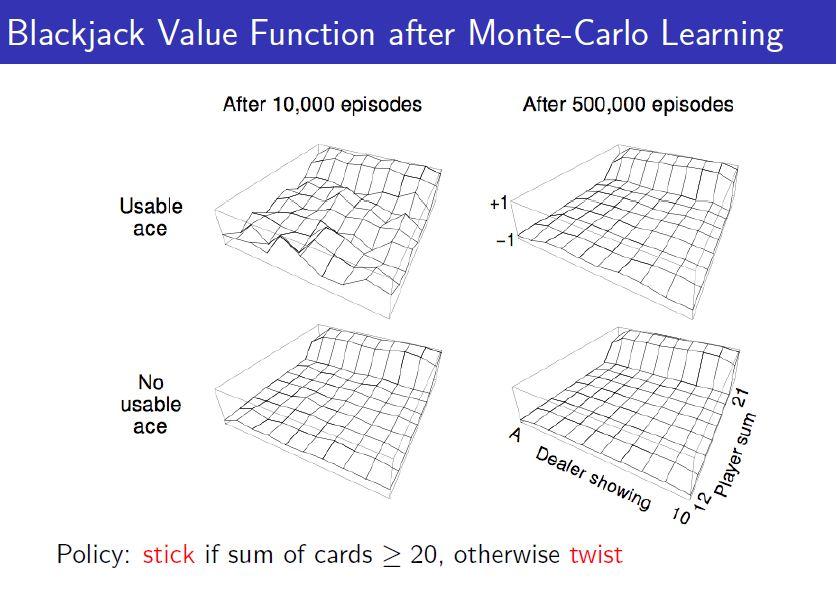

In [25]:
Image(filename='RL1/4.jpg') 

### Incremental Mean
### Incremental Monte-Carlo Updates

### Temporal-Difference Learning
- TD methods learn directly from episodes of experience
- TD is model-free: no knowledge of MDP transitions / rewards
- TD learns from incomplete episodes, by bootstrapping
- TD updates a guess towards a guess

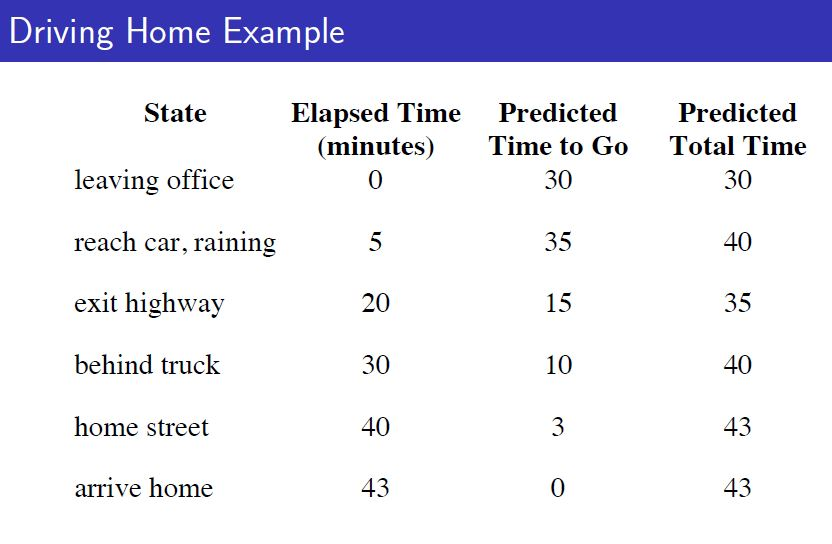

In [26]:
Image(filename='RL1/5.jpg') 

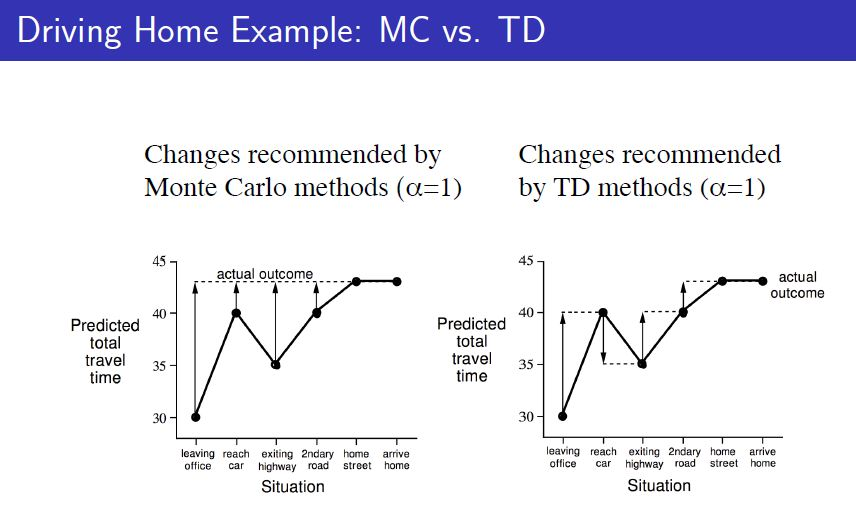

In [27]:
Image(filename='RL1/6.jpg') 

### Advantages and Disadvantages of MC vs. TD
- TD can learn before knowing the final outcome
- TD can learn online after every step
- MC must wait until end of episode before return is known
- TD can learn without the final outcome
- TD can learn from incomplete sequences
- MC can only learn from complete sequences
- TD works in continuing (non-terminating) environments
- MC only works for episodic (terminating) environments

### Bias/Variance Trade-Off
- MC has high variance, zero bias
- TD has low variance, some bias

### Bootstrapping and Sampling
- Bootstrapping: update involves an estimate
- MC does not bootstrap
- DP bootstraps
- TD bootstraps
- Sampling: update samples an expectation
- MC samples
- DP does not sample
- TD samples

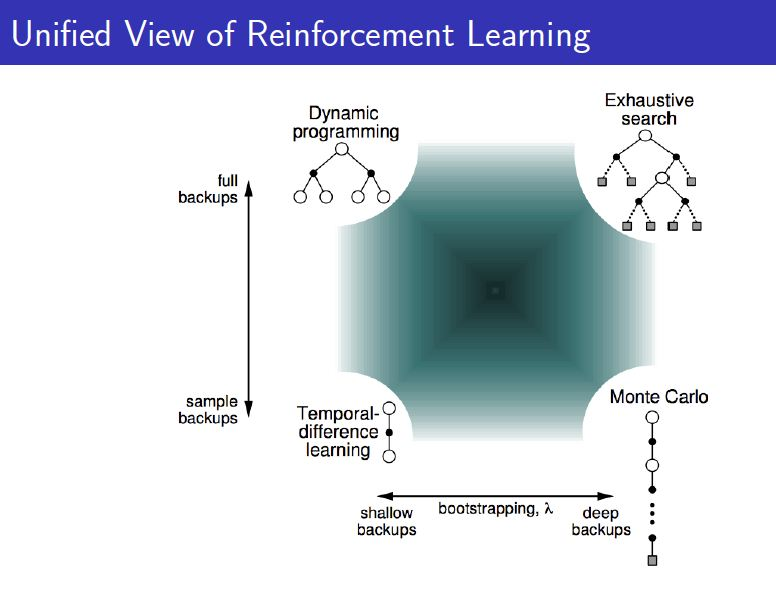

In [28]:
Image(filename='RL1/7.jpg') 

In [18]:
%pylab inline
import random


def gen_episode(states):
    episode = []
    k = len(states)/2 # start node index
    try:
        while states[k] not in terminals:
            episode.append(states[k])
            action = -1 if random.randint(0, 1) else 1
            k += action
    finally:
        episode.append(states[k])
    return episode

def gen_episodes(states, trials):
    episodes = []
    for n in range(trials):
        episodes.append(gen_episode(states))
    return episodes

def initialize(states):
    vals_dic = {}
    for state in states:
        if state not in terminals:
            vals_dic[state]=0.5
        else:
            vals_dic[state]=0
    return vals_dic

def value_iteration(eps, vals_dic, alpha):
    for t in range(0, len(eps)-1):
        new_val = vals_dic[eps[t]]+alpha*(reward(eps[t+1])+vals_dic[eps[t+1]]-vals_dic[eps[t]])
        vals_dic[eps[t]]=new_val

def reward(state):
    if state == 'rterm':
        return 1.
    else:
        return 0.

Populating the interactive namespace from numpy and matplotlib


In [19]:
states = ['lterm', 'A', 'B', 'C', 'D', 'E', 'rterm']
terminals = ('lterm', 'rterm')
values_dic1 = initialize(states)
values_dic10 = initialize(states)
values_dic100 = initialize(states)

In [20]:
episodes1 = gen_episodes(states, 1)
episodes10 = gen_episodes(states, 10)
episodes100 = gen_episodes(states, 100)

for episode in episodes1:
	value_iteration(episode, values_dic1, 0.1)
for episode in episodes10:
	value_iteration(episode, values_dic10, 0.1)
for episode in episodes100:
	value_iteration(episode, values_dic100, 0.1)

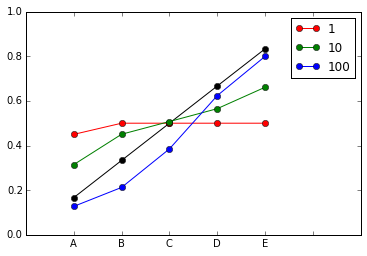

In [21]:
plot([1/6., 2/6., 3/6., 4/6., 5/6.], 'ko-')
plot([values_dic1[x] for x in states[1:-1]], 'ko-', color='r', label='1')
plot([values_dic10[x] for x in states[1:-1]], 'ko-', color='g', label='10')
plot([values_dic100[x] for x in states[1:-1]], 'ko-', color='b', label='100')
xticks(range(6), states[1:-1])
ylim([0,1])
xlim([-1, 6])
legend(loc='best')